In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
#define a set of colors for use in the figure
viridian = '#277C5E'
new_viridian = '#29803C'
xanthous = '#F8AB25'
new_xanthous = '#F6AE2D'
flame = '#E46A3A'
new_flame = '#F26419'
redder = '#E92545'
french_gray = '#BEBFC5'
airforce_blue = '#5F8EB0'
neuroncolors = [(10/256,33/256,88/256),(29/256,92/256,167/256),(88/256,155/256,203/256)]
LPcolor=neuroncolors[0]
PDcolor = neuroncolors[2]
neuronlabels = ['LP','PY','PD']

In [18]:
trajs = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/11/5/biastrack.dat')

In [19]:
dt = 0.01
stepint = 2
step=dt*stepint
time = np.arange(0,50000,step)
num_ics = 25
interval = 1
repeats = int(num_ics/interval)

In [20]:
trajs = trajs.reshape(repeats,len(time),2)

In [6]:
par1min = -5
par1max = 25
par1step = .05
par2min = -20
par2max = 10
par2step = .05

# # # which goes an extra for each dimension
# par1res = np.arange(par1min,par1max+.001,par1step)
# par2res = np.arange(par2min,par2max+.001,par2step)
par1res = np.arange(par1min,par1max,par1step)
par2res = np.arange(par2min,par2max,par2step)
pyloric = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/99/pyloricslice_highres_smaller.dat').reshape(len(par1res),len(par2res)).swapaxes(0,1)

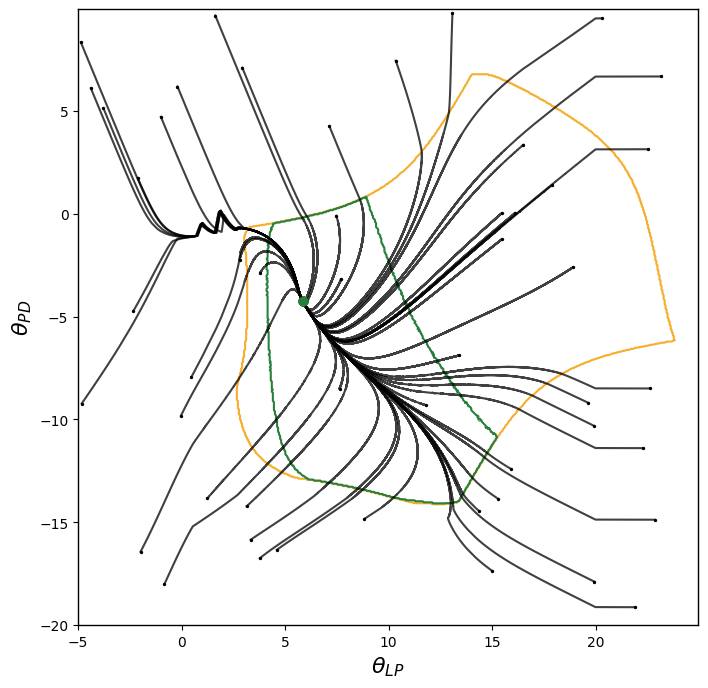

In [23]:
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['axes.linewidth'] = 1

plt.contour(par1res,par2res,pyloric,levels=[0.15,0.3],colors=[new_xanthous,new_viridian])
for i in range(repeats):
    if (trajs[i,0,1]>par2res[0])and(trajs[i,0,1]<par2res[-1]):
        # if (trajs[i,-1,0]>5):
        #     plt.scatter(trajs[i,-1,0],trajs[i,-1,1],color=viridian,zorder=2)
        # elif trajs[i,-1,1]>-2.5:
        #     plt.scatter(trajs[i,-1,0],trajs[i,-1,1],color=new_flame,zorder=2)
        # else:
        #     plt.scatter(trajs[i,-1,0],trajs[i,-1,1],color=new_xanthous,zorder=2)
        # plt.scatter(trajs[i,-1,0],trajs[i,-1,1],color=redder,zorder=2)
        plt.plot(trajs[i,:,0],trajs[i,:,1],color='k',alpha=1)
        plt.scatter(trajs[i,0,0],trajs[i,0,1],color='k',s=2)
        plt.scatter(trajs[i,-1,0],trajs[i,-1,1],color=new_viridian,zorder=2)
# plt.plot(trajs[repeats-1,:,0],trajs[repeats-1,:,1],color=new_viridian,alpha=1)
plt.xlabel(r'$\theta_{LP}$',fontsize=16)
plt.ylabel(r'$\theta_{PD}$',fontsize=16)
plt.show()

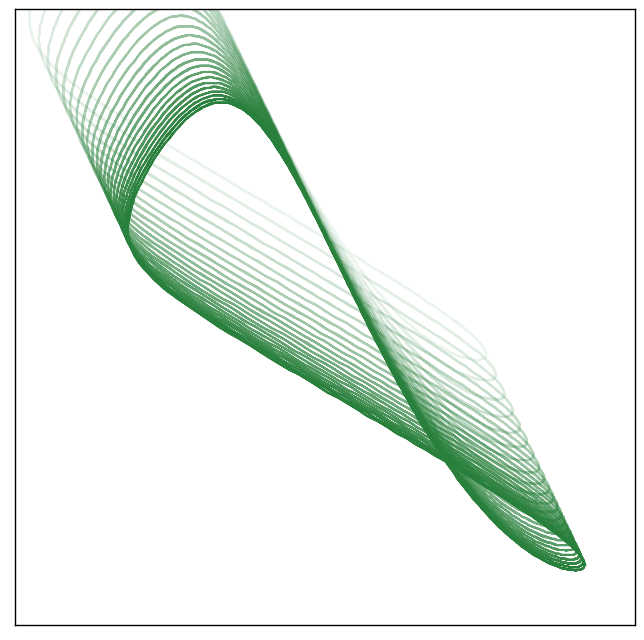

In [88]:
backup = 50000
dur = 500
plt.xticks([])
plt.yticks([])
plt.xlim(5.84,5.8455)
plt.ylim(-4.2385,-4.2335)
num = 23
for i in range(1,num):
    plt.plot(trajs[repeats-1,-i*backup:-(i*backup)+dur,0],trajs[repeats-1,-i*backup:-(i*backup)+dur,1],color=new_viridian,alpha=1-((1/num)*(i-1)))
plt.plot(trajs[repeats-1,-500:,0],trajs[repeats-1,-500:,1],color=new_viridian,alpha=1)
plt.show()

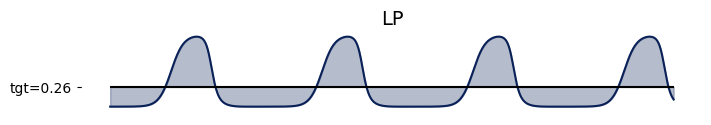

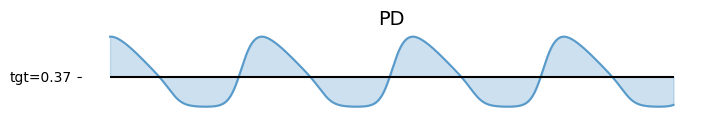

In [25]:
cycle = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/99/Other Plane Trajectories/evolved.dat')
time = np.arange(3000)
plt.rcParams['figure.figsize'] = (8,1)
plt.xticks([])
plt.yticks([.26],labels=['tgt=0.26'])
plt.title('LP',fontsize=14)
plt.plot(time,cycle[-len(time):,0],color=neuroncolors[0])
plt.hlines(.26,0,len(time),color='k')
plt.fill_between(time,np.ones_like(time)*.26,cycle[-len(time):,0],color=neuroncolors[0],alpha=.3)
plt.show()
plt.xticks([])
plt.yticks([.37],labels=['tgt=0.37'])
plt.title('PD',fontsize=14)
plt.plot(time,cycle[-len(time):,2],color=neuroncolors[2])
plt.hlines(.37,0,len(time),color='k')
plt.fill_between(time,np.ones_like(time)*.37,cycle[-len(time):,2],color=neuroncolors[2],alpha=.3)
plt.show()

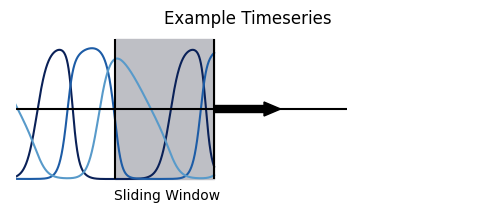

In [50]:
num_cycles_display = 1.5
time = np.arange(802*(num_cycles_display+1))
dur = int(802*num_cycles_display)
plt.rcParams['figure.figsize'] = (6,2)
plt.rcParams['axes.edgecolor'] = 'w'
plt.xlim(0,len(time)+800)
for i in range(3):
    plt.plot(time[:dur],cycle[-len(time):-len(time)+dur,i],color=neuroncolors[i],label=neuronlabels[i])
plt.hlines(.5,time[0],time[dur]+800,colors='k')
plt.title('Example Timeseries')
# plt.legend()
plt.fill_betweenx(np.linspace(0,1),time[dur-600],time[dur],color='#BEBFC5')
plt.vlines([time[dur-600],time[dur]],0,1,colors='k',linestyles='solid')
plt.text(600,-.15,'Sliding Window',fontsize=10)
plt.arrow(dur,.5,400,0,width=0.05,head_width=0.1,length_includes_head=True,head_length=100,fc='k')
plt.xticks([])
plt.yticks([])
plt.show()    

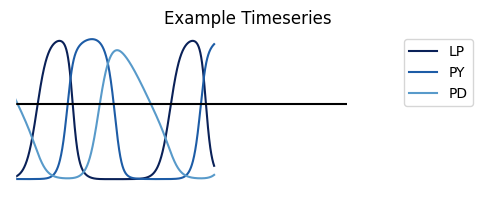

: 

In [ ]:
num_cycles_display = 1.5
time = np.arange(802*(num_cycles_display+1))
dur = int(802*num_cycles_display)
plt.rcParams['figure.figsize'] = (6,2)
plt.rcParams['axes.edgecolor'] = 'w'
plt.xlim(0,len(time)+800)
for i in range(3):
    plt.plot(time[:dur],cycle[-len(time):-len(time)+dur,i],color=neuroncolors[i],label=neuronlabels[i])
plt.hlines(.5,time[0],time[dur]+800,colors='k')
plt.title('Example Timeseries')
# plt.legend()
# plt.fill_betweenx(np.linspace(0,1),time[dur-600],time[dur],color='#BEBFC5')
# plt.vlines([time[dur-600],time[dur]],0,1,colors='k',linestyles='solid')
# plt.text(600,-.15,'Sliding Window',fontsize=10)
# plt.arrow(dur,.5,400,0,width=0.05,head_width=0.1,length_includes_head=True,head_length=100,fc='k')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()    

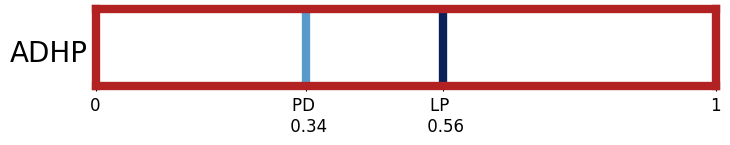

In [40]:
#create a universal HP indicator
plt.rcParams['figure.figsize'] = (8,1)
plt.rcParams['axes.edgecolor'] = 'firebrick'
plt.rcParams['axes.linewidth'] = 6


LPlb = .56
PDlb = .34
plt.xlim(0,1)
plt.yticks([])
ticklocs=[0,LPlb,PDlb,1]
ticklabels = [0,'LP \n %s'%LPlb,'PD \n %s'%PDlb,1]
plt.xticks(ticklocs,labels=ticklabels,rotation=0,fontsize=12)
plt.ylabel('ADHP',rotation=0,fontsize=20,labelpad=30,y=0.25)
plt.vlines([LPlb,PDlb],0,1,colors=[neuroncolors[0],neuroncolors[2]],linewidth=6)
plt.show()

In [59]:
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['axes.linewidth'] = 1
LPcolor=neuroncolors[0]
PDcolor = neuroncolors[2]

In [97]:
#use information for manufacturing hp to do what you want
indiv = 99
avgs = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/HPAgnosticAverage_highres.dat'%indiv).reshape(len(par1res),len(par2res),3).swapaxes(0,1)
pyloric = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/pyloricslice_highres.dat'%indiv).reshape(len(par1res),len(par2res)).swapaxes(0,1)

In [7]:
stx = -5
stopx = 16
sty = -16
stopy = 8
stxidx = np.where(par1res.round(2)==stx)[0][0]
stopxidx = np.where(par1res.round(2)==stopx)[0][0]
stopyidx = np.where(par2res.round(2)==stopy)[0][0]
styidx = np.where(par2res.round(2)==sty)[0][0]
def new_HP_contours(avgs,pylslice,LB1,LB3,adhpcolor,plot_clean = False):
    if plot_clean:
        num = 3
    else:
        num=2
    f,axes=plt.subplots(num,1,sharex=True,figsize=(5,10.6))
    plt.subplots_adjust(bottom=0)
    for ax in axes:
        ax.set_xlim(stx,stopx)
        ax.set_ylim(sty,stopy)
        ax.set_xticks(np.arange(stx,stopx+0.01,4))
        ax.set_yticks(np.arange(sty,stopy+0.01,4))
    if plot_clean:
        axes[2].set_facecolor('darkgray')
    im = axes[0].pcolormesh(par1res[stxidx:stopxidx],par2res[styidx:stopyidx],avgs[styidx:stopyidx,stxidx:stopxidx,0],cmap='Greys_r',vmax=1,vmin=0)
    im2 = axes[1].pcolormesh(par1res[stxidx:stopxidx],par2res[styidx:stopyidx],avgs[styidx:stopyidx,stxidx:stopxidx,2],cmap='Greys_r',vmax=1,vmin=0)
    cbar_ax = f.add_axes([0.13, .43, 0.76, 0.03])
    plt.rcParams['axes.edgecolor'] = adhpcolor
    plt.rcParams['axes.linewidth'] = 3
    cbar = plt.colorbar(im,cax=cbar_ax,orientation='horizontal')
    plt.rcParams['axes.edgecolor'] = 'k'
    plt.rcParams['axes.linewidth'] = 1
    cbar.ax.vlines([LB1,LB3],-1,1,colors=[LPcolor,PDcolor],linewidth=3)
    cbar.ax.set_xticks([0,LB1,LB3,1])
    # cbar.ax.set_xticks([0,LB1,LB3,1],labels=['0','.29','.36','1'])
    axes[0].contour(par1res[stxidx:stopxidx],par2res[styidx:stopyidx],avgs[styidx:stopyidx,stxidx:stopxidx,0],levels=[LB1],colors=[LPcolor],linewidths=3)
    axes[0].contour(par1res[stxidx:stopxidx],par2res[styidx:stopyidx],avgs[styidx:stopyidx,stxidx:stopxidx,2],levels=[LB3],colors=[PDcolor],linestyles='dotted',linewidths=3)
    axes[0].contour(par1res[stxidx:stopxidx],par2res[styidx:stopyidx],pylslice[styidx:stopyidx,stxidx:stopxidx],levels=[.3],colors=[new_viridian],zorder=1,linewidths=2)
    axes[1].contour(par1res[stxidx:stopxidx],par2res[styidx:stopyidx],avgs[styidx:stopyidx,stxidx:stopxidx,2],levels=[LB3],colors=[PDcolor],linewidths=3)
    axes[1].contour(par1res[stxidx:stopxidx],par2res[styidx:stopyidx],avgs[styidx:stopyidx,stxidx:stopxidx,0],levels=[LB1],colors=[LPcolor],linestyles='dotted',linewidths=3)
    axes[1].contour(par1res[stxidx:stopxidx],par2res[styidx:stopyidx],pylslice[styidx:stopyidx,stxidx:stopxidx],levels=[.3],colors=[new_viridian],zorder=1,linewidths=2)
    axes[1].set_xlabel(r'$\theta_{LP}$',fontsize=16)
    axes[0].set_ylabel(r'$\theta_{PD}$',rotation=0,fontsize=16)
    axes[1].set_ylabel(r'$\theta_{PD}$',rotation=0,fontsize=16)
    axes[0].set_title('LP average',rotation='vertical',x=-0.05,y=0.3,fontsize=18)
    axes[1].set_title('PD average',rotation='vertical',x=-0.05,y=0.3,fontsize=18)
    axes[0].yaxis.tick_right()
    axes[0].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()
    axes[1].yaxis.set_label_position("right")
    if plot_clean:
        axes[2].contour(par1res,par2res,avgs[:,:,0],levels=[LB1],colors=[LPcolor])
        axes[2].contour(par1res,par2res,avgs[:,:,2],levels=[LB3],colors=[PDcolor])
        axes[2].contour(par1res,par2res,pylslice,levels=[.3],colors=['w'],zorder=1,linewidths=1)

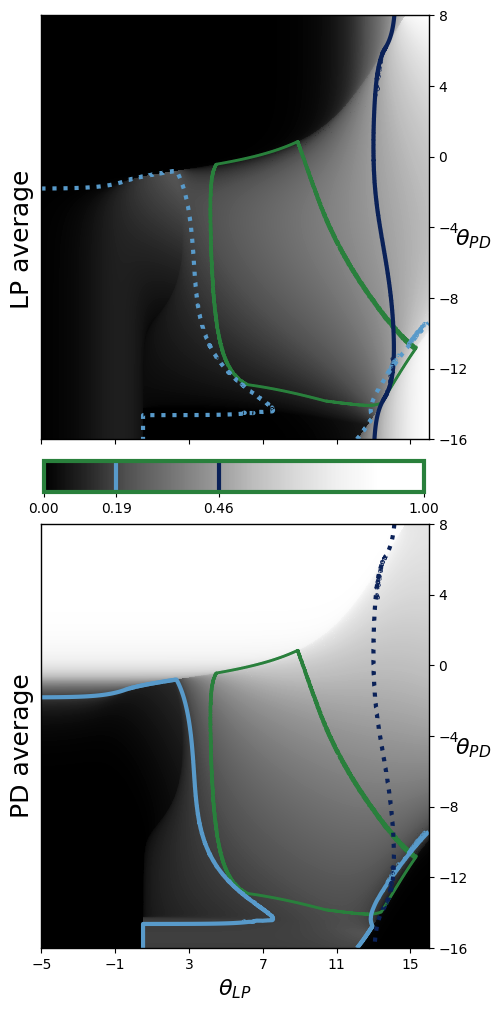

In [101]:
new_HP_contours(avgs,pyloric,.46,.19,new_viridian)

In [243]:
avgs[np.where(pyloric==np.max(pyloric))]

array([[0.299091, 0.395813, 0.44232 ],
       [0.298708, 0.395909, 0.442987]])

In [22]:
par1min = -16
par1max = 16
par1step = .01
par2min = -16
par2max = 16
par2step = .01

# # # which goes an extra for each dimension
par1res = np.arange(par1min,par1max+.001,par1step)
par2res = np.arange(par2min,par2max+.001,par2step)
# par1res = np.arange(par1min,par1max,par1step)
# par2res = np.arange(par2min,par2max,par2step)
pyloric = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/11/pyloricslice_highres.dat').reshape(len(par1res),len(par2res)).swapaxes(0,1)
avgs = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/11/HPAgnosticAverage_highres.dat').reshape(len(par1res),len(par2res),3).swapaxes(0,1)

In [23]:
#zooming
par1bounds = [-16,16]
par2bounds = [-16,16]
par1boundidxs = np.zeros(2)
par2boundidxs = np.zeros(2)
for i in range(2):
    par1boundidxs[i] = int(np.where(par1res.round(2)==par1bounds[i])[0][0])
    par2boundidxs[i] = int(np.where(par2res.round(2)==par2bounds[i])[0][0])
par1boundidxs = par1boundidxs.astype(int)
par2boundidxs = par2boundidxs.astype(int)
par1res = par1res[int(par1boundidxs[0]):int(par1boundidxs[1])]
par2res = par2res[int(par2boundidxs[0]):int(par2boundidxs[1])]


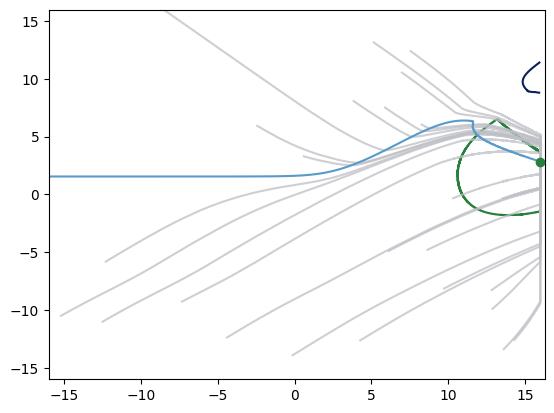

In [26]:
plt.xlim(-16,16.3)
plt.contour(par1res,par2res,pyloric[par2boundidxs[0]:par2boundidxs[1],par1boundidxs[0]:par1boundidxs[1]],levels=[.3],colors=new_viridian)
for i in range(repeats):
    plt.plot(trajs[i,:,0],trajs[i,:,1],color=french_gray,alpha=.75)
colors=[new_viridian]
k = 0
for i in [0]:
    plt.scatter(trajs[i,-1,0],trajs[i,-1,1],c=colors[k],zorder=10)
    k += 1
plt.contour(par1res,par2res,avgs[par2boundidxs[0]:par2boundidxs[1],par1boundidxs[0]:par1boundidxs[1],0],levels=[.57],colors=[LPcolor])
plt.contour(par1res,par2res,avgs[par2boundidxs[0]:par2boundidxs[1],par1boundidxs[0]:par1boundidxs[1],2],levels=[.47],colors=[PDcolor])

In [ ]:
traj = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/90/5/biastrack.dat')